# Comments Analysis

Preprocessing comments:

```python
path = "../data/"

with open(f'{path}comments/comments.json', 'r') as f:
    comments = json.load(f)['comments']

comment_len = []
for i, c in enumerate(comments):
    if 'data' in c.keys():
        d = c['data']
        length = len(d[0]['comment']['comment'])
        comment_len.append(length)
    else:
        comment_len.append(np.nan)

coms = pd.DataFrame([c['timestamp'] for c in comments], columns=['raw'])
coms = coms.assign(date=pd.to_datetime(coms['raw']*10**9)).set_index('date')
coms = coms.assign(mcount=1)
coms = coms.assign(hod=coms.index.strftime('%H').astype(int))

coms[['hod', 'mcount']].to_csv(f'{PATH}comments.csv', index=True)
coms.head()
```

----

## Loading preprocessed comments:

In [ ]:
import json
import pandas as pd
import numpy as np

from utils import hours_polar_count, project_24h

In [2]:
PATH = '../data/processed/'

In [3]:
comments = pd.read_csv(f'{PATH}comments.csv')
comments = comments.assign(date=pd.to_datetime(comments.date))\
            .set_index('date')
comments.head()

,hod,mcount
date,,
2020-04-17 18:03:40,18,1
2020-04-17 14:09:24,14,1
2020-04-15 11:31:29,11,1
2020-04-15 09:53:14,9,1
2020-04-07 12:40:28,12,1


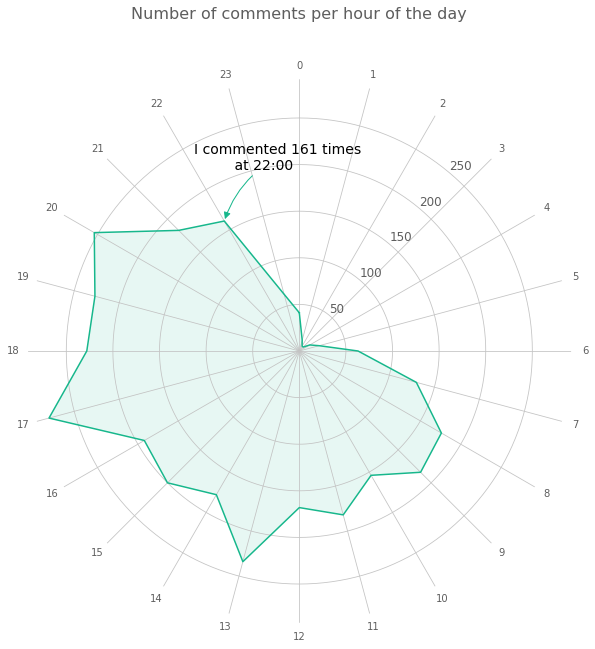

In [4]:
hourly_comments = comments.groupby('hod').sum()
hours_polar_count(hourly_comments)